# Classification with QNearestCentroid

This notebook provides a simple example usage of classifying data with the quantum algorithm `QNearestCentroid` and shows how to run the algorithm on IonQ hardware. 

In [1]:
from qcware import forge
# this line is for internal tracking; it is not necessary for use!
forge.config.set_environment_source_file('classification.ipynb')

import numpy as np
import matplotlib.pyplot as plt 
# Paste your API key below if not using Forge hosted notebooks
# forge.config.set_api_key('paste API key here')

### Generate data

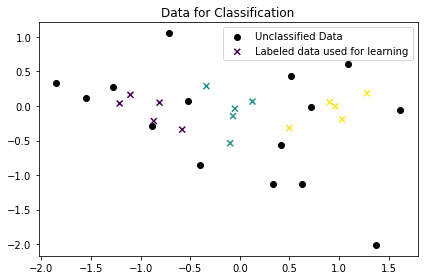

In [2]:
# Data with labels
num_data_points = 15
coordinates = 0.25 * np.random.randn(num_data_points, 2) + \
    [[i // 5 - 1, 0] for i in range(num_data_points)]
labels = np.array([i // 5 for i in range(num_data_points)])

# Extra unclassified data points
unclassified_coordinates = np.random.randn(15, 2)



plt.scatter(unclassified_coordinates[:,0], 
            unclassified_coordinates[:,1], 
            c = 'black', 
            label='Unclassified Data')
plt.scatter(coordinates[:,0], 
            coordinates[:,1], c = labels, 
            marker='x', label='Labeled data used for learning')
plt.legend()
plt.axis('tight')
plt.title('Data for Classification')
plt.tight_layout()
plt.show()

### Classify data

In [3]:
quantum_result = forge.qml.fit_and_predict(
    coordinates,
    y=labels,
    T=unclassified_coordinates,
    model='QNearestCentroid',
    backend='qcware/cpu_simulator')

print('Labels found with QNearestCentroid:')
print(quantum_result)

Labels found with QNearestCentroid:
[0 2 2 2 0 2 0 0 2 1 2 2 0 1 0]


### Visualize results

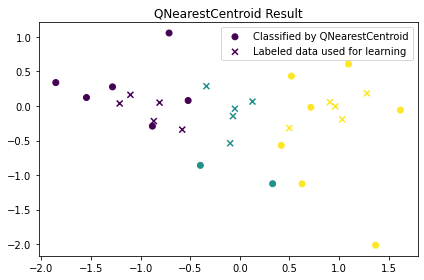

In [4]:
plt.scatter(unclassified_coordinates[:,0], 
            unclassified_coordinates[:,1], 
            c = quantum_result, 
            label='Classified by QNearestCentroid')
plt.scatter(coordinates[:,0], 
            coordinates[:,1], c = labels, 
            marker='x', label='Labeled data used for learning')
plt.legend()
plt.axis('tight')
plt.title('QNearestCentroid Result')
plt.tight_layout()
plt.show()

### Classification on IonQ hardware

Setting `backend=awsbreaket/ionq` is all that's needed to run this job on quantum hardware.

In [5]:
# Uncomment the next line to schedule the run for the next available window.
# forge.config.set_scheduling_mode("next_available")

# Uncomment to perform hardware run:
# ionq_result = forge.qml.fit_and_predict(
#     coordinates,
#     y=labels,
#     T=unclassified_coordinates,
#     model='QNearestCentroid',
#     backend='awsbraket/ionq',
#     parameters = {'num_measurements': 16}
# )